In [14]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
  os.mkdir('models')

print('tensorFlow version:',tf.__version__)
print('IS using GPU?',tf.test.is_gpu_available())

tensorFlow version: 2.2.0
IS using GPU? False


In [34]:
def get_classes(x,y):
  ind_1, _=np.where(y==0)
  ind_2, _=np.where(y==1)
  ind_3, _=np.where(y==2)
 # ind_4, _=np.where(y==3.)

  ind=np.concatenate([ind_1,ind_2,ind_3],axis=0)

  x=x[ind]
  y=y[ind]
  sh=x.shape[0]
  ind=np.random.choice(range(sh),sh,replace=False)
 
  x=x[ind]
  y=y[ind]

  y=tf.keras.utils.to_categorical(y)
  return x,y


In [35]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()
x_train,y_train=get_classes(x_train,y_train)
x_test,y_test=get_classes(x_test,y_test)
print(x_train.shape,y_train.shape)


(15000, 32, 32, 3) (15000, 3)


In [36]:
class_names=['Aeroplane','Car','Bird','cat']

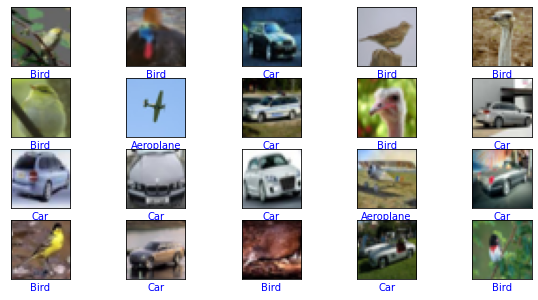

In [37]:
def show_random(x,y,p):
  indices=np.random.choice(range(x.shape[0]),20,replace=False)
  x=x[indices]
  y=y[indices]
  p=p[indices]

  plt.figure(figsize=(10,5))
  for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(x[i])
    plt.xticks([])
    plt.yticks([])
    col='green' if np.argmax(y[i])==np.argmax(p[i]) else 'red'
    plt.xlabel(class_names[np.argmax(p[i])],color='blue')

  plt.show()
show_random(x_train,y_train,y_train)



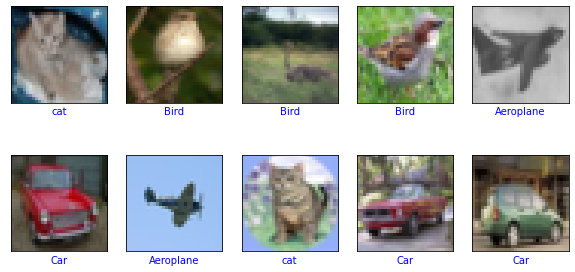

In [19]:
show_random(x_test,y_test,y_test)

In [38]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout,Flatten,Input, Dense
def create_model():
  def add_conv_block(model,num_filters):
    model.add(Conv2D(num_filters,3,activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(num_filters,3,activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.5))
    return model
    
  model=tf.keras.models.Sequential()
  model.add(Input(shape=(32,32,3)))

  model=add_conv_block(model,32)
  model=add_conv_block(model,64)
  model=add_conv_block(model,128)
  
  model.add(Flatten())
  model.add(Dense(3,activation='softmax'))

  model.compile(
      loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']
  )
  return model

model=create_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
batch_normalization_10 (Batc (None, 15, 15, 64)       

In [39]:
h=model.fit(
    x_train/255.,y_train,
    validation_data=(x_test/255.,y_test),
    epochs=10,batch_size=128,
    callbacks=[
               tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3),
               tf.keras.callbacks.ModelCheckpoint(
                   'models/model_{val_accuracy:.3f}.h5',
                   save_best_only=True,save_weights_only=False,
                   monitor='val_accuracy'
               )
    ]
) 

Epoch 1/10
118/118 [==============================] - 84s 713ms/step - loss: 0.8632 - accuracy: 0.6839 - val_loss: 2.8219 - val_accuracy: 0.3333
Epoch 2/10
118/118 [==============================] - 84s 711ms/step - loss: 0.5535 - accuracy: 0.7763 - val_loss: 2.6611 - val_accuracy: 0.3937
Epoch 3/10
118/118 [==============================] - 84s 714ms/step - loss: 0.4822 - accuracy: 0.8066 - val_loss: 2.3387 - val_accuracy: 0.4927
Epoch 4/10
118/118 [==============================] - 87s 738ms/step - loss: 0.4427 - accuracy: 0.8210 - val_loss: 1.5079 - val_accuracy: 0.5360
Epoch 5/10
118/118 [==============================] - 85s 720ms/step - loss: 0.3949 - accuracy: 0.8423 - val_loss: 1.0169 - val_accuracy: 0.6700
Epoch 6/10
118/118 [==============================] - 85s 723ms/step - loss: 0.3633 - accuracy: 0.8587 - val_loss: 0.4791 - val_accuracy: 0.8137
Epoch 7/10
118/118 [==============================] - 88s 745ms/step - loss: 0.3434 - accuracy: 0.8655 - val_loss: 0.6922 - val_ac